<a href="https://colab.research.google.com/github/nadhirasafa/Regression-Analysis-on-Tech-Company/blob/main/Nadhira_Safa_Kamiilah_Praktik_2_Modul_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from pprint import pprint
from time import time

#import library yang dibutuhkan
#library utama
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#library untuk visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk clustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#library untuk regresi
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

# Data Customer: Nomor 1

## Bagian 1: Load dan Cek Data

In [ ]:
#connect google collab ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#display isi tables dengan file yang sudah diupload ke drive terlebih dahulu
df_1 = pd.read_csv('/content/drive/MyDrive/Karier.mu/customer_data.csv')
df_1

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,9/4/2012,58,8,4,7
1,2174,1954,Graduation,46344.0,3/8/2014,38,1,2,5
2,4141,1965,Graduation,71613.0,8/21/2013,26,8,10,4
3,6182,1984,Graduation,26646.0,2/10/2014,26,2,4,6
4,5324,1981,PhD,58293.0,1/19/2014,94,5,6,5
...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,6/13/2013,46,9,4,5
2236,4001,1946,PhD,64014.0,6/10/2014,56,8,5,7
2237,7270,1981,Graduation,56981.0,1/25/2014,91,2,13,6
2238,8235,1956,Master,69245.0,1/24/2014,8,6,10,3


In [ ]:
#display struktur dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Dt_Customer        2240 non-null   object 
 5   Recency            2240 non-null   int64  
 6   NumWebPurchases    2240 non-null   int64  
 7   NumStorePurchases  2240 non-null   int64  
 8   NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [ ]:
#cek jumlah missing value di tiap kolom
df_1.isna().sum()

ID                    0
Year_Birth            0
Education             0
Income               24
Dt_Customer           0
Recency               0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
dtype: int64

In [ ]:
#menghitung proporsi missing value di tiap kolom
#sebagai pertimbangan apakah missing value dapat dihapus atau harus diimputasi
#jika proporsi missing value tidak besar, maka missing value tersebut dapat dihapus
(df_1.isna().sum()/df_1.shape[0])*100

ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Income               1.071429
Dt_Customer          0.000000
Recency              0.000000
NumWebPurchases      0.000000
NumStorePurchases    0.000000
NumWebVisitsMonth    0.000000
dtype: float64

> Berdasarkan informasi pada data, diperoleh insight sebagai berikut:   
1.   Terdapat missing value hanya pada kolom `Income` sebanyak 24 data dengan proporsi sebesar 1.1% dan sisanya tidak ada missing value lagi pada kolom lain
2.   Menurut pendapat saya, kolom `Year_Birth` sebaiknya memiliki tipe data datetime. Namun, saya tidak akan mengubah formatnya karena hal itu tidak akan berdampak signifikan pada hasil analisis. Sebaliknya, hal itu akan membuat perhitungan matematis menjadi lebih sederhana.
3.   Menurut saya, kolom `Dt_Customer` seharusnya bertipe date time




## Bagian 2: Penyesuaian Tipe Data

In [ ]:
#mengubah tipe data di kolom Dt_Customer
df_1['Dt_Customer'] = pd.to_datetime(df_1['Dt_Customer'])
df_1['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
#display dataset setelah perubahan tipe format
df_1

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5
...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,2013-06-13,46,9,4,5
2236,4001,1946,PhD,64014.0,2014-06-10,56,8,5,7
2237,7270,1981,Graduation,56981.0,2014-01-25,91,2,13,6
2238,8235,1956,Master,69245.0,2014-01-24,8,6,10,3


In [ ]:
#display struktur dataset setelah perubahan format
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2240 non-null   datetime64[ns]
 5   Recency            2240 non-null   int64         
 6   NumWebPurchases    2240 non-null   int64         
 7   NumStorePurchases  2240 non-null   int64         
 8   NumWebVisitsMonth  2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 157.6+ KB


> Dari hasil di atas, dapat dilihat bahwa format kolom `Dt_Customer` sudah berubah menjadi tipe date time.

## Bagian 3: Mengatasi Missing Value

In [ ]:
#mengatasi missing value pada kolom income
#keputusan: menghapus data missing value pada kolom income karena jumlahnya relatif sedikit dibandingkan jumlah data
df_1 = df_1.dropna(subset=['Income'])
df_1

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5
...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,2013-06-13,46,9,4,5
2236,4001,1946,PhD,64014.0,2014-06-10,56,8,5,7
2237,7270,1981,Graduation,56981.0,2014-01-25,91,2,13,6
2238,8235,1956,Master,69245.0,2014-01-24,8,6,10,3


In [ ]:
#display struktur dataset setelah penghapusan missing value
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Education          2216 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2216 non-null   datetime64[ns]
 5   Recency            2216 non-null   int64         
 6   NumWebPurchases    2216 non-null   int64         
 7   NumStorePurchases  2216 non-null   int64         
 8   NumWebVisitsMonth  2216 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 173.1+ KB


> Terlihat bahwa semua kolom sudah memiliki size yang sama dan tidak ada data yang missing

## Bagian 4: Pengecekan Duplikat Data

In [ ]:
#cek ada atau tidaknya duplicate data
print(f"Ada {df_1.duplicated().sum()} duplicate data pada data ini")

Ada 0 duplicate data pada data ini


> Dari hasil output di atas, dapat diketahui bahwa **tidak ada data yang duplikat** pada data ini, sehingga **tidak perlu dilakukan tindakan apapun** dan dapat dilanjutkan ke proses pengecekan data pencilan atau outlier.

## Bagian 5: Pengecekan Outlier Data

> Pada bagian ini, akan dilakukan pengecekan outlier pada kolom `Income` karena kolom atau variabel itulah yang bersifat numerik dan akan memiliki peran penting dalam analisis lebih lanjut untuk melihat segmentasi customer.

In [ ]:
#cek ada tidaknya outlier data
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(df_1[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df_1[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3-Q1

  if batas == 'upper_bound':
      bound = np.where(df_1[nama_kolom] >= (Q3+1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(df_1[nama_kolom] <= (Q1-1.5*IQR))
  return list(bound[0])

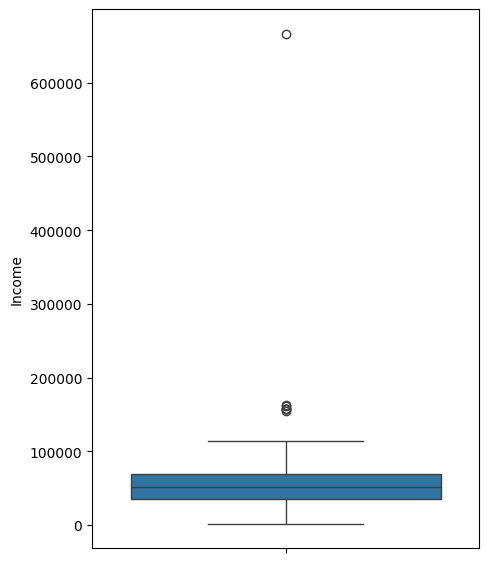

In [ ]:
#membuat visualisasi berupa boxplot dari kolom price
plt.figure(figsize = (5,7))
sns.boxplot(y='Income',data = df_1)
plt.show()

> Dari grafik di atas, dapat dilihat bahwa hanya ada **beberapa data yang terindikasi sebagai outlier**. Hal ini akan dibuktikan melalui perhitungan matematis sebagai berikut.

In [ ]:
#cek outlier kolom price dengan perhitungan matematis
upper_income = cek_outlier('Income','upper_bound')
lower_income= cek_outlier('Income','lower_bound')
print(f"Jumlah outlier pada kolom `Income` ada sebanyak {len(upper_income) + len(lower_income)} data.")

Jumlah outlier pada kolom `Income` ada sebanyak 8 data.


> Dari hasil di atas, telah diketahui secara spesifik bahwa jumlah data yang terindikasi outlier hanya 8. Karena jumlah tersebut **cenderung sedikit**, maka menurut saya, tidak apa-apa untuk **dihapus** saja.

In [ ]:
#buat fungsi agar dapat menerima input sebuah dataframe dan nama kolom untuk filter/menghapus outlier
def filter_outlier(df_1, nama_kolom):
    if nama_kolom == 'Income':
        data_temp = df_1.loc[~df_1.index.isin(upper_income)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_income)]
        return data_temp
    else :
        return df_1

#buat dataframe baru dengan memanggil fungsi filter_outlier
data1 = filter_outlier(df_1, 'Income')
print(data1.shape)

(2208, 9)


In [ ]:
#display dataset terbaru setelah dilakukan handling outlier
data1

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5
...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,2013-06-13,46,9,4,5
2236,4001,1946,PhD,64014.0,2014-06-10,56,8,5,7
2237,7270,1981,Graduation,56981.0,2014-01-25,91,2,13,6
2238,8235,1956,Master,69245.0,2014-01-24,8,6,10,3


In [ ]:
#display struktur dataset terbaru setelah dilakukan handling outlier
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2208 non-null   int64         
 1   Year_Birth         2208 non-null   int64         
 2   Education          2208 non-null   object        
 3   Income             2208 non-null   float64       
 4   Dt_Customer        2208 non-null   datetime64[ns]
 5   Recency            2208 non-null   int64         
 6   NumWebPurchases    2208 non-null   int64         
 7   NumStorePurchases  2208 non-null   int64         
 8   NumWebVisitsMonth  2208 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 172.5+ KB


> * Dari output struktur data di atas, dapat terlihat bahwa 8 data outlier pada kolom Income yang terindikasi sebagai outlier telah terhapus. Kemudian, dataset yang baru dipindah ke data1.
* Maka, saat ini data telah clean, terbebas dari masalah missing value, duplicate data, ketidaksesuaian format, dan outlier.
* Oleh karena itu, data dapat diteruskan untuk analisis.


## Bagian 6: Display Deskripsi Data

In [ ]:
#cek dan display pemusatan dan persebaran data
data1.describe()

,ID,Year_Birth,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
count,2208.000000,2208.000000,2208.000000,2208,2208.000000,2208.000000,2208.000000,2208.000000
mean,5598.040761,1968.827446,52244.715127,2013-07-10 18:15:00,49.004076,4.085598,5.802083,5.318388
min,0.000000,1893.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35233.500000,2013-01-16 00:00:00,24.000000,2.000000,3.000000,3.000000
50%,5492.000000,1970.000000,51400.500000,2013-07-09 00:00:00,49.000000,4.000000,5.000000,6.000000
75%,8430.500000,1977.000000,68634.000000,2013-12-31 06:00:00,74.000000,6.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2014-06-29 00:00:00,99.000000,27.000000,13.000000,20.000000
std,3249.336237,11.991676,25205.754605,NaN,28.949615,2.740459,3.250772,2.427114


## Bagian 7: Analisis Clustering

In [ ]:
#menambah kolom Years_Since_Registration untuk mempermudah analisis
#kolom tersebut akan menunjukkan jumlah tahun pelanggan sejak mendaftar sampai tahun sekarang
current_year = 2023
data1['Years_Since_Registration'] = current_year - data1['Dt_Customer'].dt.year

In [ ]:
#menambah kolom Age untuk mempermudah analisis
#kolom tersebut akan menunjukkan usia pelanggan tahun sekarang
data1['Age'] = current_year - data1['Year_Birth']

In [ ]:
#display dataset terbaru
data1

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7,11,66
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5,9,69
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4,10,58
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6,9,39
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5,9,42
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,2013-06-13,46,9,4,5,10,56
2236,4001,1946,PhD,64014.0,2014-06-10,56,8,5,7,9,77
2237,7270,1981,Graduation,56981.0,2014-01-25,91,2,13,6,9,42
2238,8235,1956,Master,69245.0,2014-01-24,8,6,10,3,9,67


In [ ]:
#pilih kolom yang akan masuk dalam segmentasi
selected_features = data1[['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Years_Since_Registration', 'Age']]

In [ ]:
#lakukan standarisasi data pada data yang akan digunakan untuk segmentasi agar setara
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_features)

### Hierarki Method: Ward Linkage

> Karena tidak ada permintaan khusus untuk jumlah cluster atau kelompoknya, maka saya akan menggunakan metode hierarki untuk menentukan jumlah cluster optimalnya karena bersifat hiearki sehingga peneliti tidak perlu menentukan jumlah clusternya terlebih dahulu.

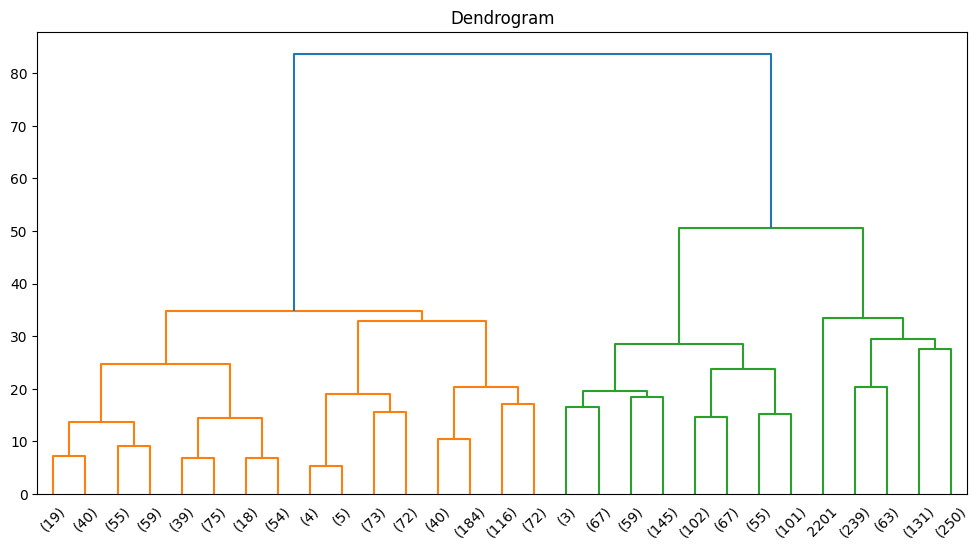

In [ ]:
#menghitung matriks jarak antar data
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(normalized_data, method='ward')

#membuat visuaslisasi berupa dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=4, truncate_mode='level')
plt.title('Dendrogram')
plt.show()

> Berdasarkan hasil dendogram tersebut, **terdapat 2 cluster besar** dari data customer ini. Oleh karena itu, saya memutuskan untuk menggunakan 2 cluster terbesar untuk jumlah clusternya.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#input jumlah cluster yang sesuai
n_clusters = 2

#menerapkan perhitungan Hierarchical Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters)
data1['Cluster'] = hierarchical_cluster.fit_predict(normalized_data)

In [ ]:
#menghitung jumlah anggota dalam setiap cluster
cluster_counts = data1['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
cluster_counts

,Cluster,Count
0,0,1283
1,1,925


In [ ]:
#menganalisis karakteristik dari masing-masing cluster
cluster_characteristics = data1.groupby('Cluster').agg({
    'Income': 'mean',
    'Recency': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Years_Since_Registration': 'mean',
    'Age': 'mean',
})

print(cluster_characteristics)

               Income    Recency  NumWebPurchases  NumStorePurchases  \
Cluster                                                                
0        65874.968823  47.910366         5.634451           7.748246   
1        33339.184865  50.521081         1.937297           3.102703   

         NumWebVisitsMonth  Years_Since_Registration        Age  
Cluster                                                          
0                 4.464536                 10.056898  56.286828  
1                 6.502703                  9.850811  51.240000  


> Berdasarkan karakteristik yang telah tampil dari masing - masing cluster, maka 2 cluster besar tersebut dapat saya beri nama sebagai:
1.   Cluster 1: High Income and Active
2.   Cluster 2: Low Income and Passive



In [ ]:
#memberi nama cluster berdasarkan karakteristiknya
cluster_names = {
    0: "High Income and Active",
    1: "Low Income and Passive",
}

#menambahkan kolom 'Cluster_Name' ke dalam DataFrame
data1['Cluster_Name'] = data1['Cluster'].map(cluster_names)
data1

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age,Cluster,Cluster_Name
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7,11,66,0,High Income and Active
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5,9,69,1,Low Income and Passive
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4,10,58,0,High Income and Active
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6,9,39,1,Low Income and Passive
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5,9,42,0,High Income and Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,2013-06-13,46,9,4,5,10,56,0,High Income and Active
2236,4001,1946,PhD,64014.0,2014-06-10,56,8,5,7,9,77,0,High Income and Active
2237,7270,1981,Graduation,56981.0,2014-01-25,91,2,13,6,9,42,0,High Income and Active
2238,8235,1956,Master,69245.0,2014-01-24,8,6,10,3,9,67,0,High Income and Active


### Non-hierarki Method: K-Means

In [ ]:
#pilih kolom yang akan masuk dalam segmentasi clustering
selected_features = data1[['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Years_Since_Registration', 'Age']]

#lakukan standarisasi data pada data yang akan digunakan untuk segmentasi agar setara
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_features)

In [ ]:
#membuat DataFrame baru yang akan digunakan untuk analisis cluster
cluster_data = pd.DataFrame(normalized_data, columns=selected_features.columns)

In [ ]:
#karena metode non-hierarki harus menentukan jumlah cluster dari awal
#maka akan saya coba dengan jumlah cluster atau k = 5
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5.fit(cluster_data)
print(f"Done fitting the K-Means in {time()-start:.3f}s.")

Done fitting the K-Means in 0.273s.


> * Setelah ini, akan dibuat kolom baru `clusters_of_5` untuk selanjutnya dicari nilai _cardinality_ dan juga `magnitude` dari tiap cluster.
* Karena ditakutkan ada subjektivitas dalam penentuan cluster, maka akan dicek juga sebagai perbandingan, yaitu menggunakan model lain dengan `k` yang lebih besar, yaitu 15.


In [ ]:
#melihat hasil clustering dengan jumlah cluster atau k = 15
K = 15
kmeans_15 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_15.fit(cluster_data)
print(f"Done fitting the K-Means in {time()-start:.3f}s.")

Done fitting the K-Means in 0.822s.


#### Hasil Cluster

In [ ]:
#menambah kolom baru berisikan hasil cluster ke DataFrame data1
data1['clusters_of_5'] = kmeans_5.predict(cluster_data)
data1['clusters_of_15'] = kmeans_15.predict(cluster_data)

#display DataFrame yang baru
with pd.option_context("display.max_columns", None):
    display(data1.head())

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age,Cluster,Cluster_Name,clusters_of_5,clusters_of_15
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7,11,66,0,High Income and Active,4,12
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5,9,69,1,Low Income and Passive,1,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4,10,58,0,High Income and Active,4,11
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6,9,39,1,Low Income and Passive,1,5
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5,9,42,0,High Income and Active,1,4


#### Cluster Cardinality

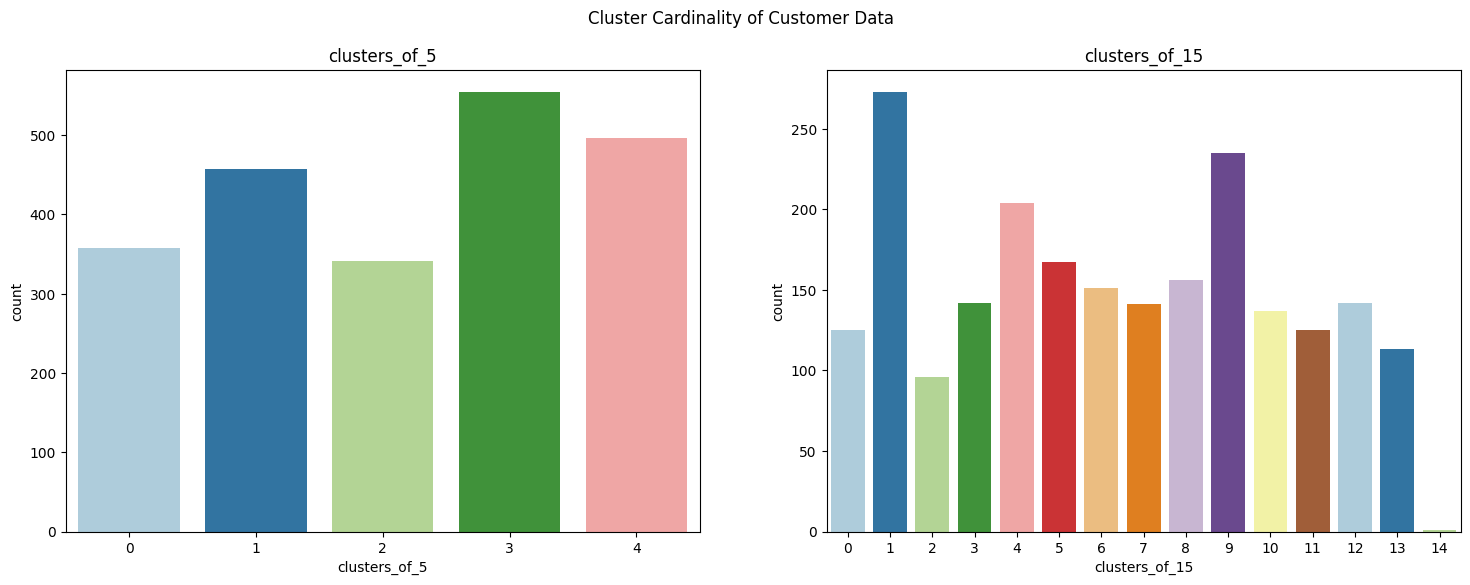

In [ ]:
#berikut adalah langkah untuk menampilkan cluster cardinality
#membuat visualisasi 2 kolom subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#menyimpan list hasil cluster
cluster_results = ["clusters_of_5", "clusters_of_15"]

#melakukan looping melalui subplot dan plot data
for ax, preds in zip(axes, cluster_results):
    sns.countplot(x=preds, data=data1, ax=ax, palette="Paired")
    ax.set_title(preds)

#memberi judul untuk keseluruhan plot
plt.suptitle("Cluster Cardinality of Customer Data")
plt.show()

> **Interpretation and Insights**

> Dari visualisasi _cluster cardinality_ di atas:
* Model dengan 5 cluster (k=5) memiliki perbedaan yang cukup jauh antara cluster `0` dan `2` dengan cluster `1`, `3`, dan `4`
* Sementara, pada model dengan 15 cluster (k=15), dapat dilihat bahwa kardinalitas cluster `1` jauh lebih banyak dibandingkan dengan cluster yang lain. Sebaliknya, cluster `2`, `14`, memiliki jumlah elemen yang jauh lebih kecil

#### Cluster Magnitude

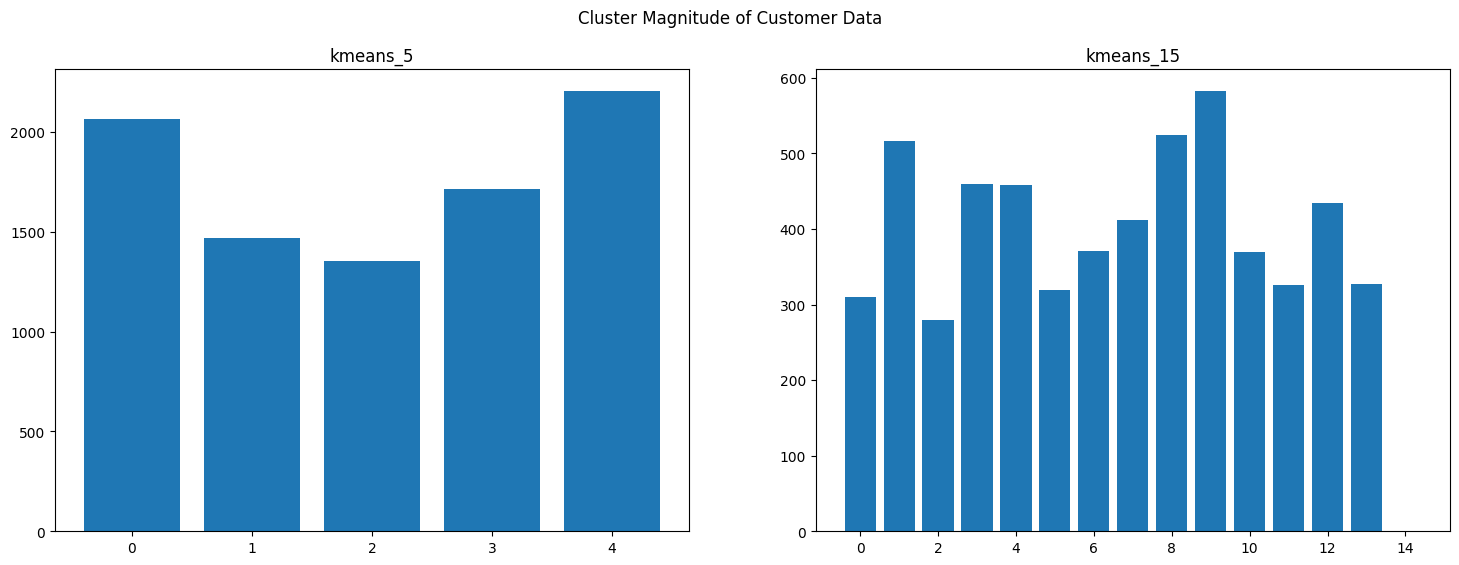

In [ ]:
#langkah dalam menampilkan cluster magnitude
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5, kmeans_15],["kmeans_5", "kmeans_15"]):
    distances = model.transform(cluster_data)
    preds = model.predict(cluster_data)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude of Customer Data")
plt.show()

####Elbow Method

In [ ]:
#langkah untuk melakukan analisis clustering dengan metode elbow
#mencari sum of squared dari jarak
ssd = []

#disclaimer: melakukan run syntax ini dapat memakan waktu yang lama, bisa mencapai 6 menit
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(cluster_data)
    print(f"Done fitting the cluster analysis in {time()-start:.3f}s.")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done fitting the cluster analysis in 0.528s.
Clustering with n_clusters=2
Done fitting the cluster analysis in 0.421s.
Clustering with n_clusters=3
Done fitting the cluster analysis in 0.192s.
Clustering with n_clusters=4
Done fitting the cluster analysis in 0.852s.
Clustering with n_clusters=5
Done fitting the cluster analysis in 0.735s.
Clustering with n_clusters=6
Done fitting the cluster analysis in 3.142s.
Clustering with n_clusters=7
Done fitting the cluster analysis in 2.151s.
Clustering with n_clusters=8
Done fitting the cluster analysis in 0.470s.
Clustering with n_clusters=9
Done fitting the cluster analysis in 0.787s.
Clustering with n_clusters=10
Done fitting the cluster analysis in 0.527s.
Clustering with n_clusters=11
Done fitting the cluster analysis in 0.765s.
Clustering with n_clusters=12
Done fitting the cluster analysis in 1.185s.
Clustering with n_clusters=13
Done fitting the cluster analysis in 2.024s.
Clustering with n_clusters=14
Done

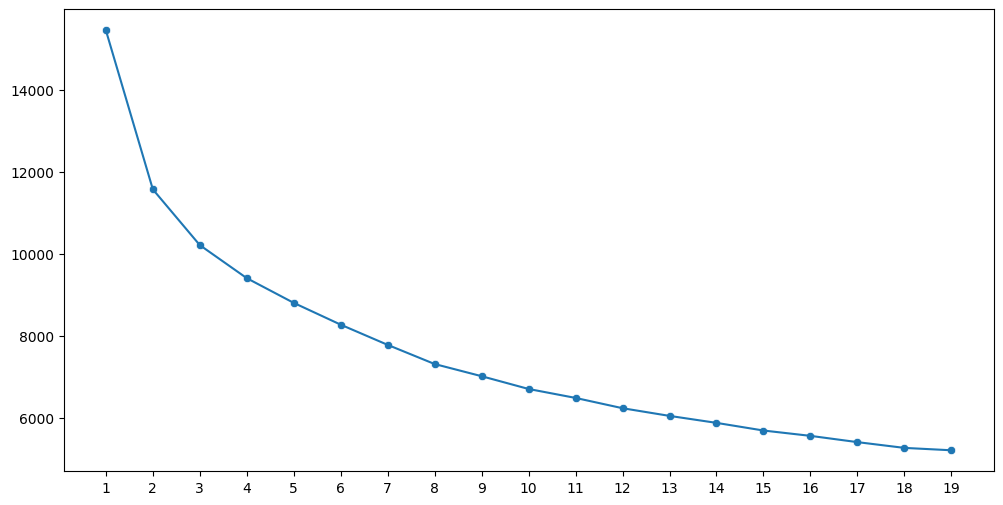

In [ ]:
#melakukan visualisasi hasil analisis
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()

> * Berdasarkan Elbow Method yang telah dilakukan, menurut saya jumlah cluster optimalnya adalah `cluster 2`, `cluster 6` atau `cluster 10` karena penurunan signifikan telah berakhir di cluster tersebut.
* Namun, hasil tersebut pun menurut saya kurang jelas, sehingga akan dilakukan pula analisis silhoutte untuk memutuskannya

####Silhoutte Method

In [ ]:
#langkah untuk melakukan analisis silhoutte
silhouette_scores = []

#disclaimer: melakukan syntax ini dapat memakan waktu yang cukup lama
for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Do clustering with n_clusters={k}")
    start = time()
    model.fit(cluster_data)
    print(f"Done fitting the cluster analysis in {time()-start:.3f}s.")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(cluster_data, model.labels_))
    print(f"Done the calculate in {time()-start:.3f}s.")

Do clustering with n_clusters=2
Done fitting the cluster analysis in 0.458s.
Calculating silhouette coefficient..
Done the calculate in 0.111s.
Do clustering with n_clusters=3
Done fitting the cluster analysis in 0.662s.
Calculating silhouette coefficient..
Done the calculate in 0.115s.
Do clustering with n_clusters=4
Done fitting the cluster analysis in 1.769s.
Calculating silhouette coefficient..
Done the calculate in 0.156s.
Do clustering with n_clusters=5
Done fitting the cluster analysis in 2.167s.
Calculating silhouette coefficient..
Done the calculate in 0.090s.
Do clustering with n_clusters=6
Done fitting the cluster analysis in 0.661s.
Calculating silhouette coefficient..
Done the calculate in 0.096s.
Do clustering with n_clusters=7
Done fitting the cluster analysis in 0.666s.
Calculating silhouette coefficient..
Done the calculate in 0.096s.
Do clustering with n_clusters=8
Done fitting the cluster analysis in 0.765s.
Calculating silhouette coefficient..
Done the calculate in 

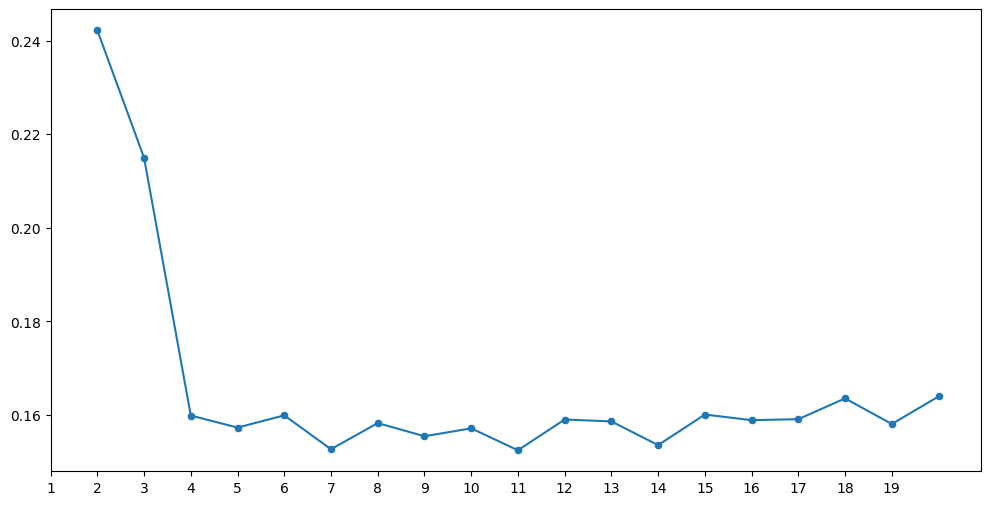

In [ ]:
#melakukan analisis silhoutte
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

> * Berdasarkan hasil analisis cluster menggunakan metode silhoutte di atas, dapat diketahui bahwa titik tertinggi dari data customernya adalah cluster 2.
* Hal tersebut menunjukkan bahwa cluster 2 termasuk cluster yang optimal dari metode K-Means ini.

### Kesimpulan

Dapat disimpulkan dari **hasil perbandingan metode** hierarki dan non-hierarki clustering di atas bahwa kedua metode tersebut menunjukkan hasil yang sama, yaitu **jumlah cluster optimal** dari data customer adalah sebanyak **dua (k=5)**.

# Data Laptop: Nomor 2

### Bagian 1: Load dan Cek Data

In [ ]:
#display isi tables dengan file yang sudah diupload ke drive terlebih dahulu
df_2 = pd.read_csv('/content/drive/MyDrive/Karier.mu/laptop_data.csv')
df_2

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [ ]:
#display struktur dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [ ]:
#menghitung jumlah missing value di tiap kolom
df_2.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

> Berdasarkan informasi pada data diketahui bahwa
1.   Tidak terindikasi adanya missing value pada data
2.   Tidak terdapat kesalahan format pada data



### Bagian 2: Cek dan Mengatasi Duplikat Data

In [ ]:
#cek duplicate data
print(f"Ada {df_2.duplicated().sum()} duplicate data pada data ini")

Ada 1 duplicate data pada data ini


In [ ]:
#menghapus data duplikat
df_2 = df_2.drop_duplicates().reset_index(drop=True)

In [ ]:
#cek apakah duplikat data sudah berhasil terhapus
print(f"Ada {df_2.duplicated().sum()} duplicate data pada data ini.")

Ada 0 duplicate data pada data ini.


### Bagian 3: Pengecekan Outlier Data

In [ ]:
#cek outlier data
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(df_2[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df_2[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3-Q1

  if batas == 'upper_bound':
      bound = np.where(df_2[nama_kolom] >= (Q3+1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(df_2[nama_kolom] <= (Q1-1.5*IQR))
  return list(bound[0])

> Pada hal ini dilakukan pengecekan outlier pada kolom `Price` karena kolom atau variabel tersebutlah yang bersifat numerik dan akan memiliki hubungan yang penting pada spesifikasi laptop

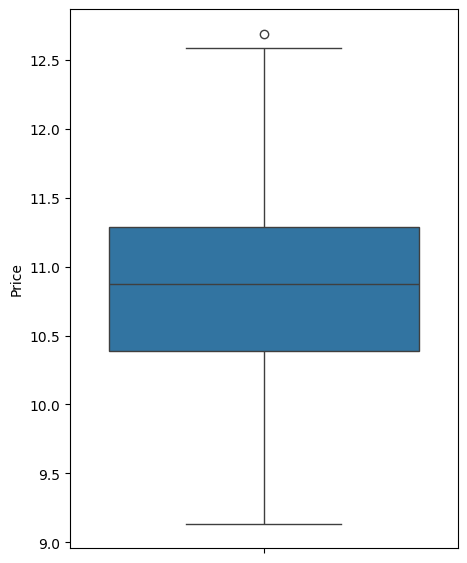

In [ ]:
#membuat visualisasi boxplot dari kolom Income
plt.figure(figsize = (5,7))
sns.boxplot(y='Price',data = df_2)
plt.show()

> Dari data di atas, terlihat hanya ada 1 data yang terindikasi sebagai outlier. Hal tersebut akan dibuktikan melalui perhitungan matematis.

In [ ]:
#cek outlier kolom price menggunakan perhitungan matematis
upper_price = cek_outlier('Price','upper_bound')
lower_price= cek_outlier('Price','lower_bound')
print(f"Jumlah outlier pada kolom Price adalah sebanyak: {len(upper_price) + len(lower_price)}")

Jumlah outlier pada kolom Price adalah sebanyak: 1


> Dari hasil di atas, telah diketahui secara pasti bahwa jumlah data yang terindikasi outlier hanya 1. Karena jumlah tersebut **cenderung sedikit**, maka menurut saya, tidak apa-apa untuk **dihapus** saja.

In [ ]:
#buat fungsi agar dapat menerima input sebuah dataframe dan nama kolom untuk filter/menghapus outlier
def filter_outlier(df_2, nama_kolom):
    if nama_kolom == 'Price':
        data_temp = df_2.loc[~df_2.index.isin(upper_price)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_price)]
        return data_temp
    else :
        return df_2

#buat dataframe baru dengan memanggil fungsi filter_outlier
data2 = filter_outlier(df_2, 'Income')
print(data2.shape)

(1272, 13)


In [ ]:
#display dataset terbaru
data2

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1268,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1269,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1270,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [ ]:
#display struktur dataset setelah penghapusan outlier
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int64  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   TouchScreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   Ppi          1272 non-null   float64
 8   Cpu_brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu_brand    1272 non-null   object 
 12  Os           1272 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.3+ KB


> * Dari output struktur data di atas, dapat terlihat bahwa data outlier pada kolom Price yang terindikasi sebagai outlier telah terhapus. Kemudian, dataset yang baru dipindah ke data2.
* Maka, saat ini data telah clean, terbebas dari masalah missing value, duplicate data, ketidaksesuaian format, dan outlier.
* Oleh karena itu, data dapat diteruskan untuk analisis.



## Bagian 4: Menampilkan Deskripsi Data

In [ ]:
data2.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,8.451258,2.041761,10.828035,0.147013,0.279874,146.936126,414.040881,186.298742
std,5.099249,0.669088,0.619774,0.354258,0.449114,42.940459,518.128204,186.597777
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


## Bagian 5: Analisis Regresi

Dalam konteks ini, saya akan menggunakan hanya variabel bertipe float dan integer, seperti HDD, Weight, Ppi, SSD, dan Ram, untuk membangun model harga laptop. Variabel dengan tipe objek atau boolean tidak akan disertakan dalam analisis ini karena fokus pada regresi linier. Variabel dummy akan dipertimbangkan dalam konteks analisis regresi logistik.

In [ ]:
#melihat korelasi antar variabel price dengan variabel lain
numerical_columns = df_2.select_dtypes(include=['float64', 'int64']).columns
correlation = df_2[numerical_columns].corr()['Price'].sort_values()
print(correlation)

HDD           -0.097155
Weight         0.151861
TouchScreen    0.194436
Ips            0.279483
Ppi            0.480621
SSD            0.658962
Ram            0.681019
Price          1.000000
Name: Price, dtype: float64


> Berdasarkan analisis korelasi antara variabel lain dan harga laptop, kami menemukan hal berikut:
* Korelasi terbesar terjadi pada variabel RAM, menunjukkan bahwa spesifikasi RAM yang lebih tinggi memiliki pengaruh signifikan terhadap harga laptop.
* Korelasi terkecil diamati pada variabel HDD dengan pengaruh negatif, menandakan bahwa spesifikasi HDD yang lebih kecil memiliki pengaruh negatif terhadap harga laptop.

Dalam analisis regresi, variabel TouchScreen dan Ips tidak akan saya masukkan ke dalam model karena bertipe dummy.

In [ ]:
model_1 = sm.ols(formula='Price ~ HDD + Weight + Ppi + SSD + Ram', data=data2).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     378.6
Date:                Sun, 12 May 2024   Prob (F-statistic):          2.44e-248
Time:                        11:03:03   Log-Likelihood:                -614.35
No. Observations:                1272   AIC:                             1241.
Df Residuals:                    1266   BIC:                             1272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5465      0.066    144.296      0.0

> Berdasarkan analisis regresi, diketahui bahwa model 1 yang menunjukkan hubungan variabel dependen `price` dan variabel independen `HDD, Weight, TouchScreen, Ips, Ppi, SSD, Ram` diperoleh informasi bahwa :  
*   Nilai koefisien determinasi sebesar 59.9%, yang artinya bahwa variabel independen mampu menjelaskan keragaman Price sebesar 59.9%, sisanya sebesar 49.1% dijelaskan oleh variabel lain di luar model.
*   Uji serentak pada model regresi ini signifikan pada alpha 0.05, yang artinya bahwa semua variabel independen secara serentak mempengaruhi variabel dependen
*   Uji parsial T pada model regresi ini dengan alpha 0.05 diketahui bahwa variabel `Weight, Ppi, SSD, Ram` signifikan secara parsial/individu dalam mempengaruhi variabel `price`, sedangkan variabel `HDD` tidak signifikan dalam mempengaruhi variabel `price`





> Karena masih ada variabel yang dianggap tidak signifikan, dilakukan evaluasi model dengan menghapus variabel yang paling tidak signifikan, yaitu HDD. Setelah itu, dilakukan pemodelan ulang tanpa variabel tersebut.

In [ ]:
model_2 = sm.ols(formula='Price ~ Weight + Ppi + SSD + Ram', data=data2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     473.1
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.55e-249
Time:                        11:11:40   Log-Likelihood:                -614.74
No. Observations:                1272   AIC:                             1239.
Df Residuals:                    1267   BIC:                             1265.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5418      0.066    144.704      0.0

> Berdasarkan analisis regresi, diketahui bahwa model 2 yang menunjukkan hubungan antara variabel dependen `price` dengan variabel independen `Weight, Ppi, SSD, Ram` diperoleh informasi bahwa :  
*   Nilai koefisien determinasi sebesar 59.9%, yang artinya bahwa variabel independen mampu menjelaskan keragaman Price sebesar 59.9%, sisanya sebesar 49.1% dijelaskan oleh variabel lain di luar model.
*   Uji serentak pada model regresi ini signifikan pada alpha 0.05, yang artinya bahwa semua variabel independen secara serentak mempengaruhi variabel dependen
*   Uji parsial T pada model regresi ini dengan alpha 0.05 diketahui bahwa variabel `Weight, Ppi, SSD, Ram` signifikan secara parsial/individu dalam mempengaruhi variabel `price`
*   Dari analisis tersebut, dapat diketahui pula bahwa variabel HDD memiliki korelasi paling rendah dengan harga laptop dibandingkan dengan variabel lainnya. Saat dilakukan analisis regresi, variabel HDD tidak menunjukkan pengaruh yang signifikan terhadap harga laptop. Oleh karena itu, evaluasi model dilakukan dengan menghapus variabel HDD. Hasilnya, koefisien regresi tidak mengalami perubahan dari model sebelumnya. Hal ini mengindikasikan bahwa ketika sebuah variabel memiliki korelasi rendah, kemungkinan besar variabel tersebut juga tidak memberikan pengaruh besar dalam analisis regresi.



## Bagian 6: Asumsi Klasik Regresi

In [ ]:
#menghitung residual atau galat pada data
residuals = model_2.resid

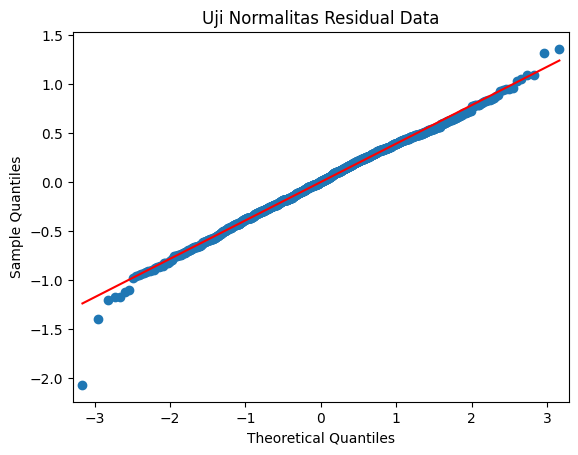

In [ ]:
#membuat visualisasi plot uji normalitas
import statsmodels.api as sm
import statsmodels.stats as stats
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s')
plt.title('Uji Normalitas Residual Data')
plt.show()

Berdasarkan uji Normalitas diketahui plot normalitas residual mendekati garis merah dengan pola linier yang artinya bahwa residual model sudah mengikuti distribusi normal, sehingga asumsi ini terpenuhi.

Berdasarkan analisis regresi yang telah dilakukan, didapatkan model terbaiknya yaitu
`Price = 9.5418 + 0.0909 Weight + 0.0035 Ppi + 0.001 SSD + 0.0466 Ram`
dengan koefisien determinasi sebesar 59.9% dan diketahui bahwa semua variabel independen berpengaruh signifikan terhadap variabel dependen baik secara simultan maupun parsial

# Conclusion

Berdasarkan analisis pada kedua data yang telah dilakukan, diperoleh infomasi sebagai berikut
1.   Segmentasi pelanggan dikelompokan dalam dua cluster berdasarkan karakteristiknya, yaitu
    * High Income and Active, yaitu kelompok pelanggan yang memiliki rata-rata Income cukup tinggi dengan aktivitas yang tinggi pula sehingga dapat dikatakan pelanggan aktif
    * Low Income and Passive, yaitu kelompok pelanggan yang memiliki rata-rata Income rendah dengan aktivitas yang rendah pula sehingga dapat dikatakan pelanggan pasif
2.   Analisis mengenai hubungan spesifikasi laptop terhadap harganya mengungkapkan hal-hal berikut:
    * Spesifikasi laptop Ram memiliki korelasi yang cukup besar dalam mempengaruhi harga laptop, dan korelasi paling kecil ditunjukkan pada variabel HDD
    * Untuk memodelkan harga laptop yang bertujuan memprediksi harga laptop berdasarkan spesifikasinya, maka diperoleh model terbaiknya yaitu `Price = 9.5418 + 0.0909 Weight + 0.0035 Ppi + 0.001 SSD + 0.0466 Ram` dengan koefisien determinasi sebesar 59.9% yang artinya variabel Weight, Ppi, SSD, dan Ram mampu menjelaskan keragaman pada variabel Price sebesar 59.9% dimana sisanya dijelaskan oleh variabel lain di luar model

